# Song Popularity Predcition

### Importing Libraries <a name='Libraries'></a>

In [617]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams


import warnings
warnings.filterwarnings("ignore")

In [618]:
rcParams['figure.figsize']=(8,6)

### Data Loading and Wrangling <a name='loading'></a>

In [619]:
df=pd.read_csv('song.csv')


In [620]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [621]:
print("{} of rows and {} of columns are present in the dataset".format(df.shape[0],df.shape[1]))

26174 of rows and 23 of columns are present in the dataset


In [622]:
df[['year', 'month', 'day']] = df['track_album_release_date'].str.split('-', expand=True)

In [623]:
df['year'] = df['year'].astype(int)

In [624]:
df.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,month,day
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754.0,2019,06,14
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600.0,2019,12,13


In [625]:
df_new = df.drop(columns = ['track_id','track_album_id','track_album_name','playlist_id','playlist_subgenre','track_album_release_date','month','day','playlist_name'],axis=1)

In [626]:
df_new.head()

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019


In [627]:
df_new.shape

(26174, 17)

In [628]:
df_new.isnull().sum()

track_name          5
track_artist        5
track_popularity    0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         1
year                0
dtype: int64

In [629]:
df_new = df_new.dropna()
df_new

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,Ain't Nothing Changed,Loyle Carner,60,r&b,0.753,0.663,8,-8.073,1,0.1760,0.5050,0.059800,0.1150,0.149,90.011,194427.0,2017
26169,Stay,Mac Miller,67,r&b,0.742,0.561,6,-7.017,1,0.1390,0.5660,0.000135,0.6410,0.550,134.010,326427.0,2016
26170,Elusive,blackwave.,53,r&b,0.567,0.675,5,-6.699,0,0.2190,0.3350,0.000000,0.2470,0.651,167.737,222200.0,2017
26171,Hands Up!,blackwave.,30,r&b,0.620,0.443,0,-8.145,1,0.3750,0.2970,0.000043,0.1190,0.581,87.423,219900.0,2017


In [630]:
duplicates=df_new.duplicated().sum()
duplicates

1926

In [631]:
df_new=df_new.drop_duplicates()

In [632]:
print('After droping {}, the dataframe is left with {} rows and {} columns'.format(duplicates,df_new.shape[0],df_new.shape[1]))

After droping 1926, the dataframe is left with 24242 rows and 17 columns


In [633]:
df_new.nunique().sort_values()

mode                    2
playlist_genre          5
key                    12
year                   63
track_popularity      101
danceability          816
energy                946
valence              1213
speechiness          1263
liveness             1577
acousticness         3465
instrumentalness     4445
track_artist         8735
loudness             9522
tempo               16256
duration_ms         16443
track_name          19200
dtype: int64

In [634]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,24242.0,42.894151,24.468832,0.000000,26.0000,47.000000,62.000000,100.000
danceability,24242.0,0.654837,0.149786,0.000000,0.5580,0.675000,0.765000,0.979
energy,24242.0,0.677413,0.181009,0.000175,0.5590,0.697000,0.818000,1.000
key,24242.0,5.369771,3.625316,0.000000,2.0000,6.000000,9.000000,11.000
loudness,24242.0,-7.021173,3.046929,-46.448000,-8.4970,-6.465000,-4.908250,1.275
mode,24242.0,0.578170,0.493862,0.000000,0.0000,1.000000,1.000000,1.000
speechiness,24242.0,0.111876,0.106859,0.000000,0.0403,0.063300,0.143000,0.918
acousticness,24242.0,0.195055,0.228162,0.000000,0.0225,0.102000,0.290000,0.994
instrumentalness,24242.0,0.058299,0.187361,0.000000,0.0000,0.000006,0.001448,0.994
liveness,24242.0,0.185513,0.150142,0.000000,0.0927,0.125000,0.237000,0.996


#### Visualised and dropped outliers using IQR

In [635]:
def plot_and_remove_outliers(df, columns):
    # Plot boxplots for each column
    fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 6))
    axs = axs.ravel()
    for i, column in enumerate(columns):
        axs[i].boxplot(df[column])
        axs[i].set_title(column)
        axs[i].set_xlabel('Value')
    plt.tight_layout()
    plt.show()

    # Calculate and remove outliers for each column
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        original_shape = df.shape[0]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        new_shape = df.shape[0]
        rows_dropped = original_shape - new_shape

        print(f"The updated dataframe with outliers removed for {column}: \nNumber of rows dropped: {rows_dropped} \nFinal dataframe shape: {df.shape}")
    
    # Return the updated dataframe after removing outliers
    return df


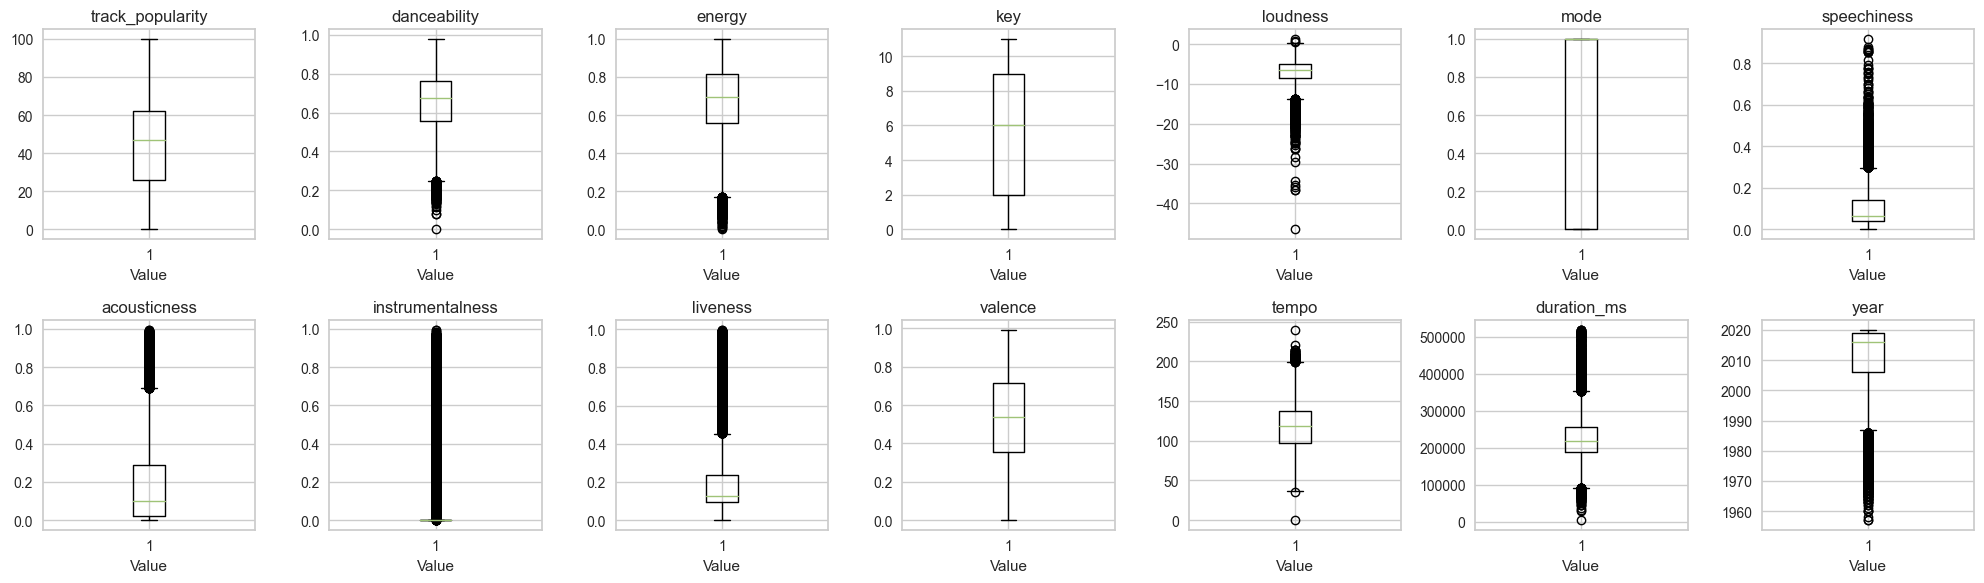

The updated dataframe with outliers removed for track_popularity: 
Number of rows dropped: 0 
Final dataframe shape: (24242, 17)
The updated dataframe with outliers removed for danceability: 
Number of rows dropped: 188 
Final dataframe shape: (24054, 17)
The updated dataframe with outliers removed for energy: 
Number of rows dropped: 171 
Final dataframe shape: (23883, 17)
The updated dataframe with outliers removed for key: 
Number of rows dropped: 0 
Final dataframe shape: (23883, 17)
The updated dataframe with outliers removed for loudness: 
Number of rows dropped: 645 
Final dataframe shape: (23238, 17)
The updated dataframe with outliers removed for mode: 
Number of rows dropped: 0 
Final dataframe shape: (23238, 17)
The updated dataframe with outliers removed for speechiness: 
Number of rows dropped: 1860 
Final dataframe shape: (21378, 17)
The updated dataframe with outliers removed for acousticness: 
Number of rows dropped: 1208 
Final dataframe shape: (20170, 17)
The updated 

In [636]:
columns_to_plot = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year']
df_new = plot_and_remove_outliers(df_new, columns_to_plot)


In [637]:
df_new

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26164,Best Of Me,Chrisette Michele,28,r&b,0.833,0.694,9,-6.639,1,0.0414,0.2850,0.000018,0.3900,0.575,110.995,232720.0,2007
26165,Happy Feelin's,Ledisi,0,r&b,0.509,0.496,7,-6.056,1,0.0489,0.4910,0.000026,0.3300,0.429,72.186,307840.0,2009
26166,Think Of You,Ledisi,32,r&b,0.728,0.622,10,-6.300,0,0.2380,0.0382,0.000015,0.0387,0.745,81.955,308240.0,2007
26167,Foreplay,Jalen Santoy,66,r&b,0.730,0.422,5,-6.211,0,0.0678,0.1230,0.002920,0.1050,0.505,118.427,173785.0,2016


In [638]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13616 entries, 0 to 26170
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        13616 non-null  object 
 1   track_artist      13616 non-null  object 
 2   track_popularity  13616 non-null  int64  
 3   playlist_genre    13616 non-null  object 
 4   danceability      13616 non-null  float64
 5   energy            13616 non-null  float64
 6   key               13616 non-null  int64  
 7   loudness          13616 non-null  float64
 8   mode              13616 non-null  int64  
 9   speechiness       13616 non-null  float64
 10  acousticness      13616 non-null  float64
 11  instrumentalness  13616 non-null  float64
 12  liveness          13616 non-null  float64
 13  valence           13616 non-null  float64
 14  tempo             13616 non-null  float64
 15  duration_ms       13616 non-null  float64
 16  year              13616 non-null  int32 

In [639]:
ranges = [
    (0, 20, "Unpopular"),
    (20, 40, "Less Popular"),
    (40, 60, "Moderately Known"),
    (60, 80, "Well Known"),
    (80, 101, "Top 20")
]

# Function to categorize the popularity of songs
def categorize_popularity(popularity):
    for r in ranges:
        if r[0] <= popularity < r[1]:
            return r[2]


# Add a new column to the dataframe
df_new["popularity_range"] = df_new["track_popularity"].apply(categorize_popularity)
df_new

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,popularity_range
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2019,Well Known
2,All the Time - Don Diablo Remix,Zara Larsson,70,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2019,Well Known
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2019,Well Known
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2019,Well Known
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049.0,2019,Well Known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26164,Best Of Me,Chrisette Michele,28,r&b,0.833,0.694,9,-6.639,1,0.0414,0.2850,0.000018,0.3900,0.575,110.995,232720.0,2007,Less Popular
26165,Happy Feelin's,Ledisi,0,r&b,0.509,0.496,7,-6.056,1,0.0489,0.4910,0.000026,0.3300,0.429,72.186,307840.0,2009,Unpopular
26166,Think Of You,Ledisi,32,r&b,0.728,0.622,10,-6.300,0,0.2380,0.0382,0.000015,0.0387,0.745,81.955,308240.0,2007,Less Popular
26167,Foreplay,Jalen Santoy,66,r&b,0.730,0.422,5,-6.211,0,0.0678,0.1230,0.002920,0.1050,0.505,118.427,173785.0,2016,Well Known


### A graphical representation that displays the popularity statistics of a dataset.

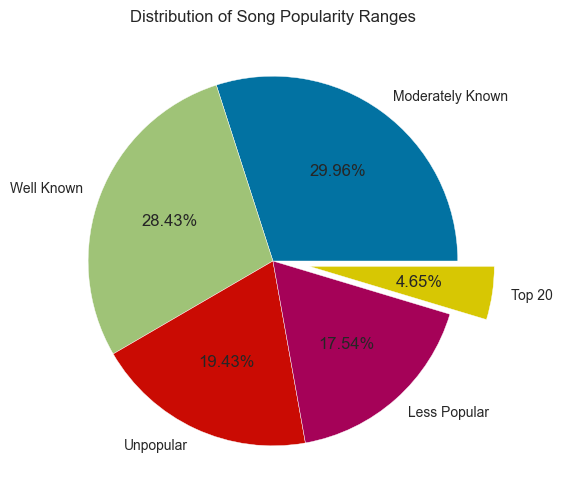

In [640]:
explode=[0,0,0,0,0.2]
# Count the number of songs in each popularity range
popularity_counts = df_new['popularity_range'].value_counts()

# Create a pie chart of popularity ranges
plt.pie(popularity_counts.values, labels=popularity_counts.index, autopct="%0.2f%%",explode= explode)

# Add title to the chart
plt.title('Distribution of Song Popularity Ranges')

# Display the chart
plt.show()


### A graphical representation that displays the genre count.

In [641]:
import plotly.express as px

# Create a dataframe with counts of each genre
genre_counts = df_new['playlist_genre'].value_counts().reset_index()
genre_counts.columns = ['playlist_genre', 'count']

# Sort the genres by count in descending order
genre_counts = genre_counts.sort_values('count', ascending=False)

# Create a bar chart
fig = px.bar(genre_counts, x='playlist_genre', y='count', color='playlist_genre', title='Top Genres in the Dataset')

fig.show()

Popularity distribution of dataset

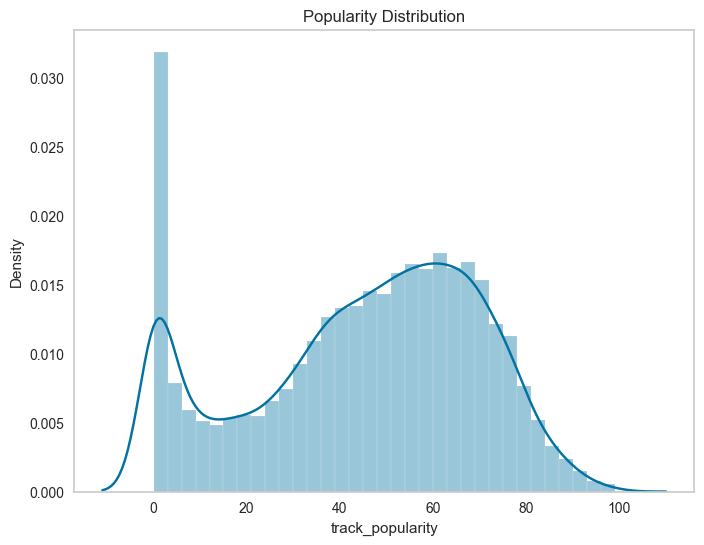

In [642]:
sns.distplot(df_new['track_popularity']).set_title('Popularity Distribution')
plt.grid()


Distribution for all numerical columns

In [643]:
def getDistribution(data):
    for feature in data.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(data[feature], kde=True).set_title('{} Distribution'.format(feature))

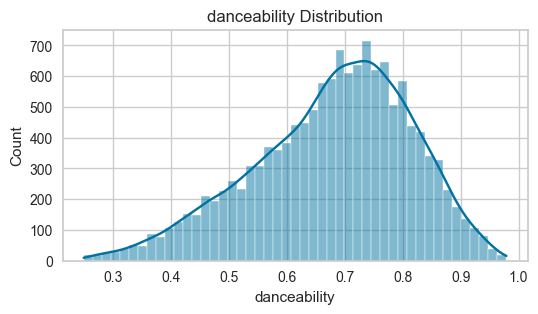

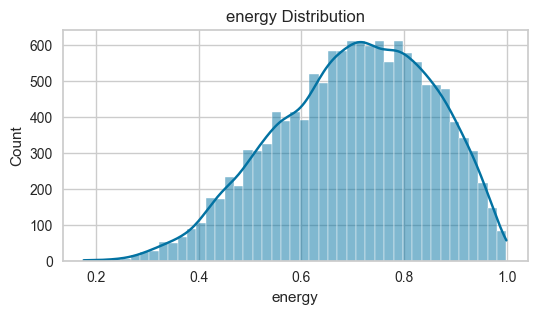

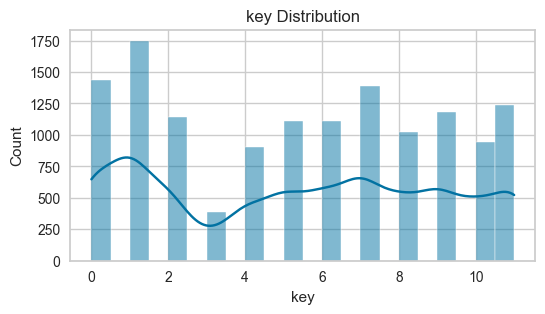

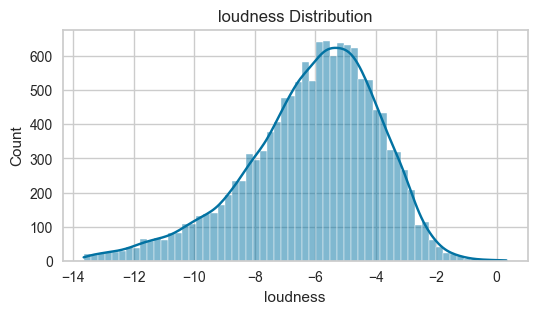

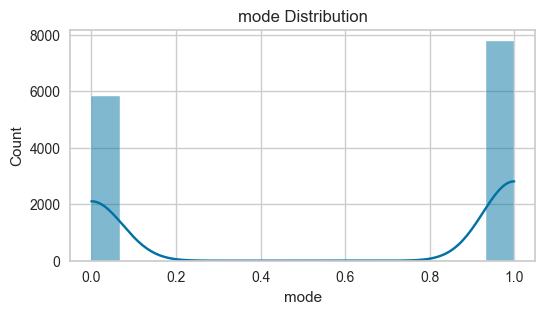

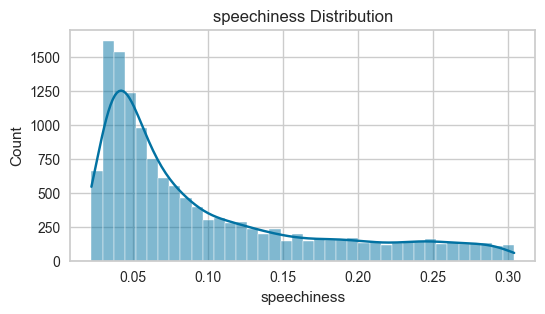

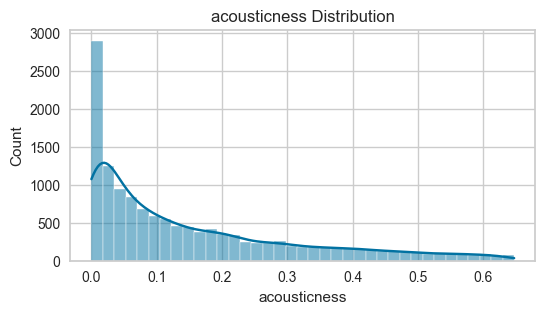

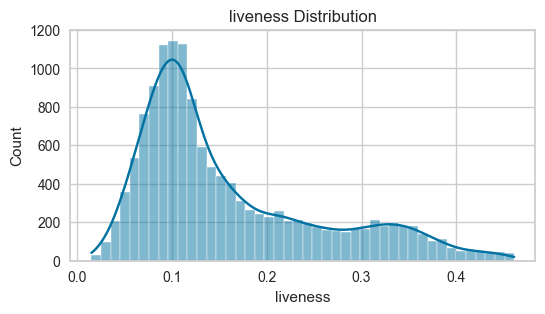

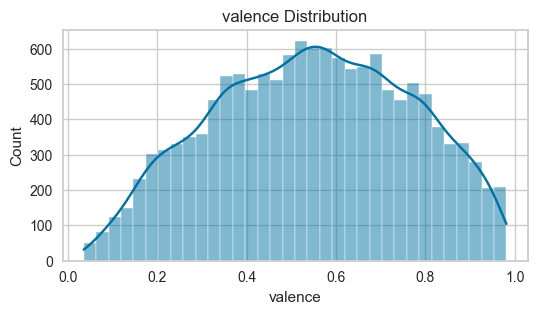

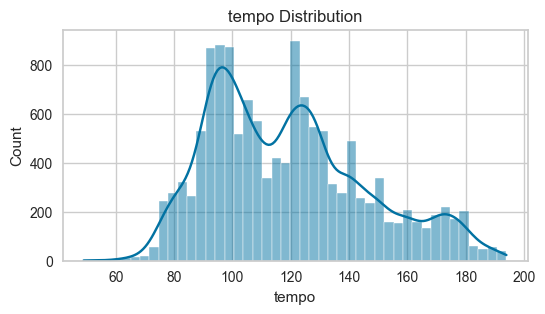

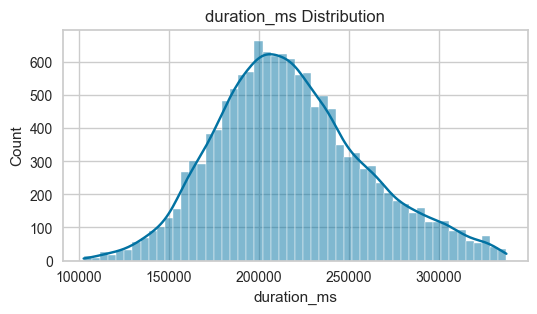

In [644]:
getDistribution(df_new[numerical_cols])

In [645]:
df_new.drop(['instrumentalness',],axis=1,inplace=True)

#### Graphical representation of popularity trends throughout the years

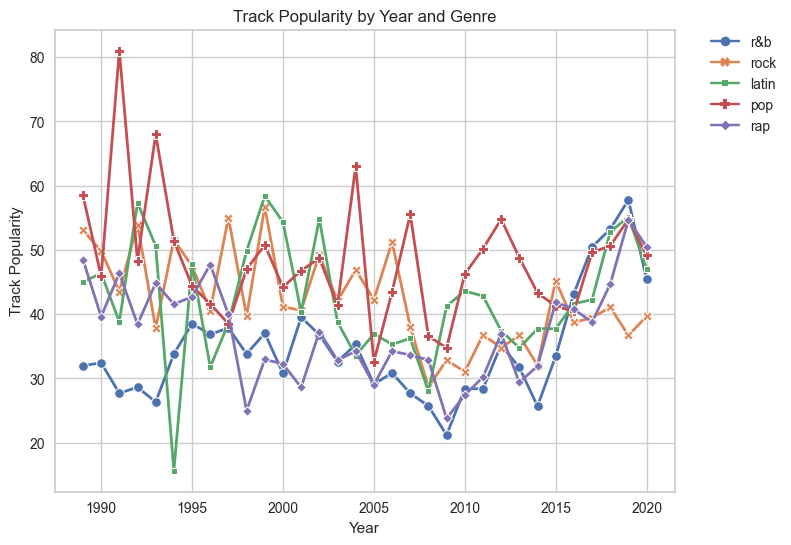

In [646]:
# Sort the data by year_range in ascending order
df_new = df_new.sort_values(by="year")

# Plot the data with ascending x-axis
sns.lineplot(x="year", y="track_popularity", hue="playlist_genre", data=df_new, palette="deep", linewidth=2, style="playlist_genre", markers=True, ci=None, dashes=False)
plt.title("Track Popularity by Year and Genre")
plt.xlabel("Year")
plt.ylabel("Track Popularity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [647]:
df_new['popularity_range']= df_new['popularity_range'].replace({'Unpopular':1,'Less Popular':2,'Moderately Known':3,'Well Known':4,'Top 20':5})

### What characteristics do popular songs have in common, if any?

In [648]:
df_top20=df_new[df_new['track_popularity']>=80]

In [649]:
df_top20

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,year,popularity_range
12412,Under the Bridge,Red Hot Chili Peppers,81,rock,0.559,0.345,4,-13.496,1,0.0459,0.057600,0.1410,0.4580,84.581,264307.0,1991,5
1962,Losing My Religion,R.E.M.,81,pop,0.666,0.855,9,-5.051,0,0.0295,0.179000,0.0987,0.8030,125.639,268427.0,1991,5
13700,Smells Like Teen Spirit,Nirvana,81,rock,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.1060,0.7200,116.761,301920.0,1991,5
13648,Losing My Religion,R.E.M.,81,rock,0.666,0.855,9,-5.051,0,0.0295,0.179000,0.0987,0.8030,125.639,268427.0,1991,5
13671,Creep,Radiohead,82,rock,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.1290,0.1040,91.841,238640.0,1993,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,Lose You To Love Me,Selena Gomez,85,r&b,0.488,0.343,4,-8.985,1,0.0436,0.556000,0.2100,0.0978,102.819,206459.0,2020,5
696,You should be sad,Halsey,86,pop,0.591,0.585,2,-6.350,1,0.0277,0.143000,0.1090,0.3240,110.940,205473.0,2020,5
694,Yummy,Justin Bieber,95,pop,0.662,0.519,9,-6.554,0,0.1060,0.404000,0.1210,0.4950,145.841,210427.0,2020,5
693,Morado,J Balvin,82,pop,0.881,0.696,11,-3.838,0,0.0797,0.137000,0.0927,0.7810,97.002,200667.0,2020,5


#### Artists having more  than 5 hits in Top 20

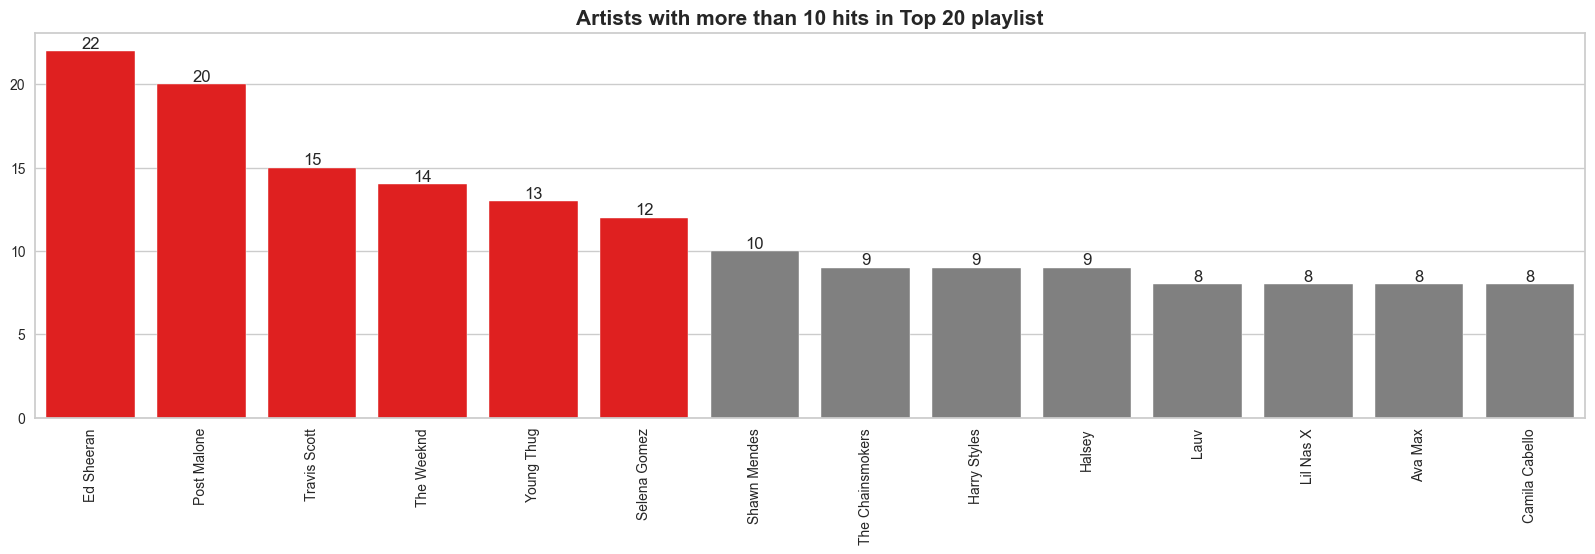

In [650]:
# artists counts
index = df_top20['track_artist'].value_counts()[df_top20['track_artist'].value_counts()>7].index.tolist()

# number of songs per artists
val = df_top20['track_artist'].value_counts()[df_top20['track_artist'].value_counts()>7].values.tolist()

plt.rcParams['figure.figsize']=20,5
clrs = ['grey' if (x < val[5]) else 'red' for x in val ]
ax= sns.barplot(x=index, y=val, palette=clrs) #colors clrs
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Artists with more than 10 hits in Top 20 playlist',fontsize=15, fontweight='bold');
plt.show()

In [651]:
import plotly.express as px
categories_artist= df_top20['track_artist'].value_counts().head(10).index.tolist() #We are using this later
values_artist= df_top20['track_artist'].value_counts().head(10).values.tolist()    #We are using this later
fig =px.funnel (y=categories_artist,
    x=values_artist,title='Top 10 artists with greatest number of songs appearing in the Top 20 ')
               

fig.update_layout(
    font_family="Courier New",
    font_color="red",
    title_font_family="Times New Roman",
    title_font_color="red",
    title_x=0.55,
    title_font=dict(size=30)
)
fig.write_image("fig1.png")

fig.show()

#### Identifying the genres of top 20 most popular songs 

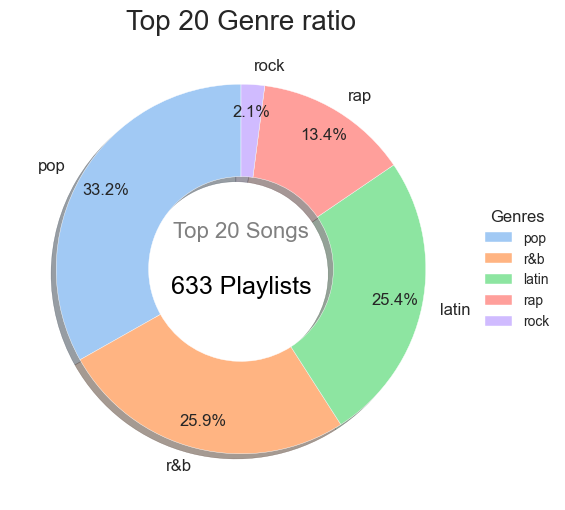

In [652]:

# Get genre counts
genre_counts = df_top20['playlist_genre'].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for the chart
colors = sns.color_palette('pastel')[0:len(genre_counts)]

# Create donut chart with shadow effect
wedges, texts, autotexts = ax.pie(genre_counts.values, labels=genre_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, textprops={'fontsize': 12}, shadow=True)

# Add circle in center to create donut
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(center_circle)

# Add labels to center of donut
total_playlists = genre_counts.sum()

ax.text(0, 0.2, 'Top 20 Songs', ha='center', va='center', fontsize=16, color='gray')
ax.text(0, -0.1, f'{total_playlists} Playlists', ha='center', va='center', fontsize=18, color='black')

# Set title and legend
ax.set_title('Top 20 Genre ratio', fontsize=20)
ax.legend(wedges, genre_counts.index, title='Genres', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Display plot
plt.show()


#### Relationship between Artist, Genres and Track Popularity

In [653]:
df_top5=df_new[df_new['track_popularity']>=97]

In [654]:
df_top5['track_popularity'].value_counts()

98    10
97     7
99     2
Name: track_popularity, dtype: int64

In [655]:
import plotly.express as px

fig = px.sunburst(df_top5, path=['playlist_genre', 'track_artist'], values='track_popularity', color='track_popularity')

fig.update_layout(
    title="Top 5 Playlist Genres and Track Artists with Popularity"
)

fig.show()



- latin - 97.833
- rap - 97.5
- pop - 97.6
- r&b - 97.833

by this we can conclude latin and r&b hold the maximum number of popular records as compared to other genres

In [656]:
from sklearn.preprocessing import StandardScaler

In [657]:
# Create a StandardScaler object
scaler = StandardScaler()

# Perform min-max scaling on numerical columns
numerical_cols = ['danceability', 'energy','key','loudness','mode','speechiness','acousticness','liveness','valence','tempo','duration_ms']
df_new[numerical_cols] = scaler.fit_transform(df_new[numerical_cols])

# Display the transformed dataframe
df_new

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,year,popularity_range
24957,Whip Appeal,Babyface,40,r&b,0.488255,-1.667262,1.012824,-1.638411,0.865450,-0.941487,2.732055,0.134933,-0.103811,-0.345161,2.700655,1989,3
24428,Back To Life,Soul II Soul,59,r&b,1.016979,-1.453948,0.459928,-2.534286,0.865450,0.605132,-0.624661,-1.244600,0.574046,-0.662527,0.245625,1989,3
24442,Every Little Step - Remix,Bobby Brown,32,r&b,-0.018439,0.365883,0.459928,-1.958920,0.865450,-0.397056,-0.949352,-1.347627,0.605892,-0.598268,1.516059,1989,2
13386,Tempted,Squeeze,0,rock,0.341387,-1.713924,0.183480,-1.826704,-1.155468,-0.971282,-0.211670,-0.701647,0.137306,-0.927722,0.546145,1989,1
12389,Free Fallin',Tom Petty,76,rock,-0.407639,-1.693926,-0.092968,-3.297489,0.865450,-0.988888,0.365897,-1.015880,0.119109,-1.272240,0.907078,1989,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,Yummy,Justin Bieber,95,r&b,-0.121247,-1.227302,1.012824,-0.206835,-1.155468,0.104038,1.558291,-0.400808,-0.231193,0.985773,-0.179872,2020,5
6395,Dig,Benjamin Hav,51,rap,1.369462,-0.527367,-0.369416,0.611990,-1.155468,-0.276522,-0.643292,-0.756251,-0.667933,-0.550248,-0.974794,2020,3
21578,Underdog,Alicia Keys,73,r&b,-0.172651,0.125905,-1.475208,0.626580,-1.155468,-0.681460,2.502271,-0.277175,-1.127420,-1.062230,-0.232797,2020,4
21580,Let You Down Let You Go,Jozzy,11,r&b,0.796677,-1.533941,-1.475208,-1.337507,-1.155468,-0.829080,0.601891,-0.472927,0.687780,0.224247,-0.431617,2020,1


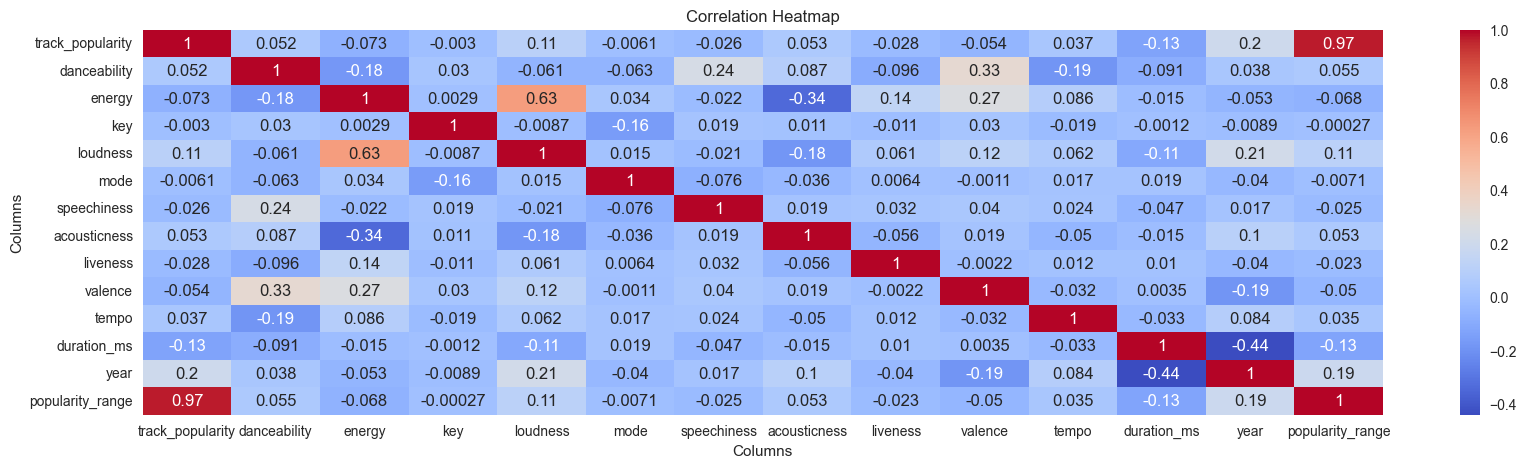

In [658]:
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)

# Set plot title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Display the plot
plt.show()

In [659]:
df_top10=df_new[df_new['track_popularity']>=90]

In [660]:
# Adjust the size of the bubbles by changing the multiplication factor
sizes = df_top10['track_popularity'] * 10  # Adjust the multiplication factor to change the size of the bubbles

fig = px.scatter(df_top10,  # Use df_top10 consistently
                 x='energy', 
                 y='loudness',
                log_x=True,
                hover_name='playlist_genre',
                color='track_popularity',
                size=sizes)

fig.update_layout(
    title="Scatter Plot of Danceability vs. Energy for Songs with popularity more than 90",
    xaxis_title="Energy",
    yaxis_title="Loudness"
)

fig.show()


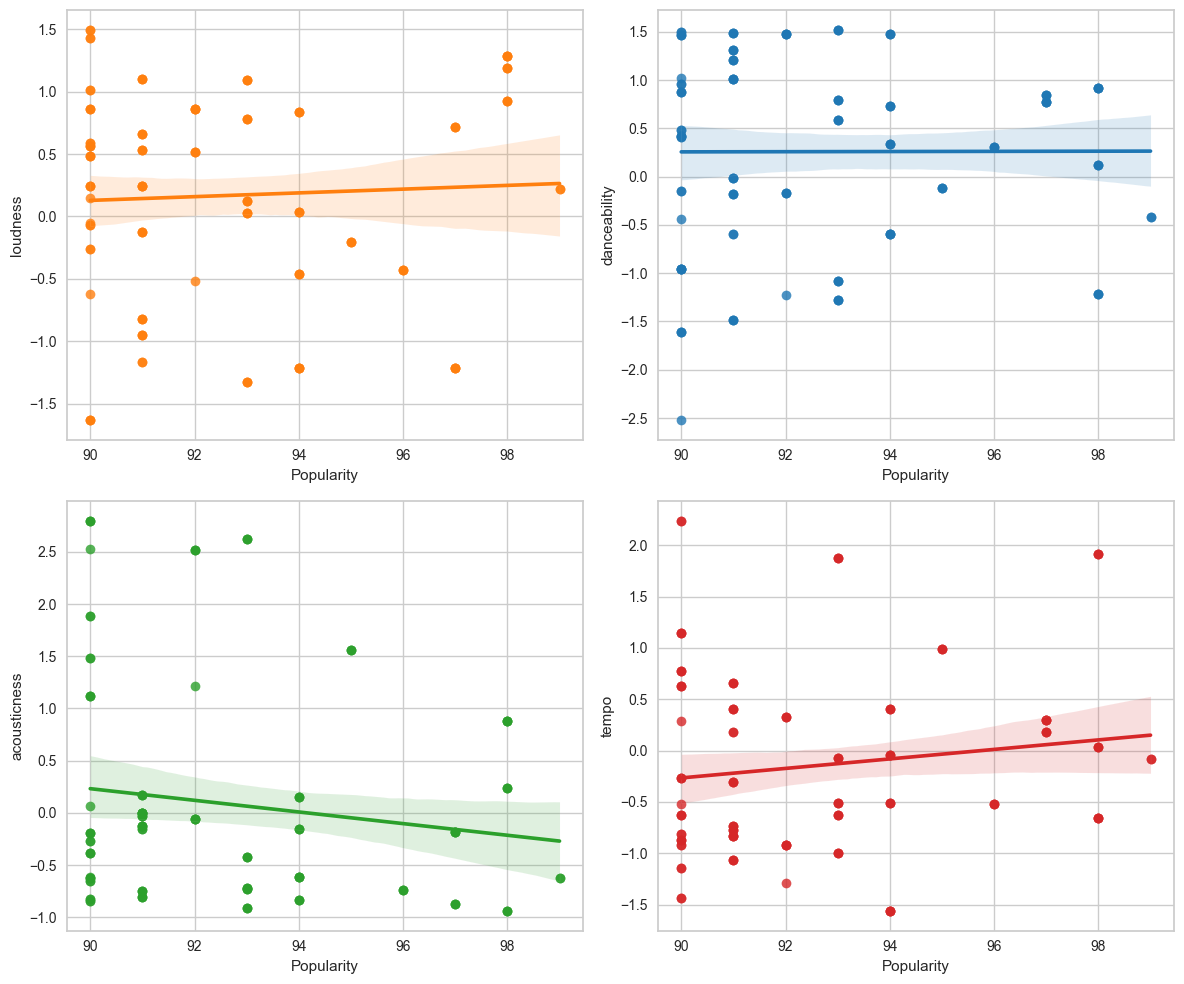

In [661]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = sns.color_palette(['#ff7f0e','#1f77b4','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf'])

# Set the plot style and size
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the scatter plots with regression lines and custom palette for each subplot
sns.regplot(x='track_popularity', y='loudness', data=df_top10, scatter=True, color=custom_palette[0], ax=axes[0, 0])
axes[0, 0].set_xlabel("Popularity")
axes[0, 0].set_ylabel("loudness")

sns.regplot(x='track_popularity', y='danceability', data=df_top10, scatter=True, color=custom_palette[1], ax=axes[0, 1])
axes[0, 1].set_xlabel("Popularity")
axes[0, 1].set_ylabel("danceability")

sns.regplot(x='track_popularity', y='acousticness', data=df_top10, scatter=True, color=custom_palette[2], ax=axes[1, 0])
axes[1, 0].set_xlabel("Popularity")
axes[1, 0].set_ylabel("acousticness")

sns.regplot(x='track_popularity', y='tempo', data=df_top10, scatter=True, color=custom_palette[3], ax=axes[1, 1])
axes[1, 1].set_xlabel("Popularity")
axes[1, 1].set_ylabel("tempo")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [676]:
df_new['playlist_genre'].value_counts()

pop      3280
latin    3129
rap      2986
r&b      2606
rock     1615
Name: playlist_genre, dtype: int64

In [677]:
df_pop = df_new[df_new["playlist_genre"] == "pop"]
df_latin = df_new[df_new["playlist_genre"] == "latin"]
df_rap = df_new[df_new["playlist_genre"] == "rap"]
df_rnb = df_new[df_new["playlist_genre"] == "r&b"]
df_rock = df_new[df_new["playlist_genre"] == "rrock"]



In [678]:
import plotly.graph_objects as go

# Create a radar chart
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=[df_pop['danceability'].max(), df_pop['energy'].max(), df_pop['loudness'].max(), df_pop['speechiness'].max(), 
       df_pop['acousticness'].max(),df_pop['tempo'].max()],
    theta=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo'],
    fill='toself',
    name='Max values'
))
fig.update_layout(
    title="Pop songs features",
    title_font=dict(size=24)
)
fig.show()

In [679]:
# Create a radar chart
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=[df_latin['danceability'].max(), df_latin['energy'].max(), df_latin['loudness'].max(), df_latin['speechiness'].max(), 
       df_latin['acousticness'].max(),df_latin['tempo'].max()],
    theta=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo'],
    fill='toself',
    name='Max values'
))
fig.update_layout(
    title="Latin songs features",
    title_font=dict(size=24)
)
fig.show()

In [680]:
# Create a radar chart
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=[df_rap['danceability'].max(), df_rap['energy'].max(), df_rap['loudness'].max(), df_rap['speechiness'].max(), 
       df_rap['acousticness'].max(),df_rap['tempo'].max()],
    theta=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo'],
    fill='toself',
    name='Max values'
))
fig.update_layout(
    title="Rap songs features",
    title_font=dict(size=24)
)
fig.show()

In [681]:
# Create a radar chart
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=[df_rnb['danceability'].max(), df_rnb['energy'].max(), df_rnb['loudness'].max(), df_rnb['speechiness'].max(), 
       df_rnb['acousticness'].max(),df_rnb['tempo'].max()],
    theta=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo'],
    fill='toself',
    name='Max values'
))
fig.update_layout(
    title="R&B songs features",
    title_font=dict(size=24)
)
fig.show()

In [683]:
import plotly.graph_objects as go

# Create a radar chart
fig = go.Figure()



fig.add_trace(go.Scatterpolar(
    r=[df_top10['danceability'].max(), df_top10['energy'].max(), df_top10['loudness'].max(), df_top10['speechiness'].max(), 
       df_top10['acousticness'].max(),df_top10['tempo'].max()],
    theta=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','tempo'],
    fill='toself',
    name='Max values'
))

fig.update_layout(
    title="Features for Top 10 songs",
    title_font=dict(size=24)
)
fig.show()

In [544]:
df_new.head(2)

,track_name,track_artist,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,year,popularity_range
24957,Whip Appeal,Babyface,40,r&b,0.488255,-1.667262,1.012824,-1.638411,0.86545,-0.941487,2.732055,0.134933,-0.103811,-0.345161,2.700655,1989,3
24428,Back To Life,Soul II Soul,59,r&b,1.016979,-1.453948,0.459928,-2.534286,0.86545,0.605132,-0.624661,-1.244600,0.574046,-0.662527,0.245625,1989,3


In [545]:
df_new.drop(['track_name','track_artist','year','playlist_genre'],axis=1,inplace=True)

In [546]:
df_new.head(2)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,popularity_range
24957,40,0.488255,-1.667262,1.012824,-1.638411,0.86545,-0.941487,2.732055,0.134933,-0.103811,-0.345161,2.700655,3
24428,59,1.016979,-1.453948,0.459928,-2.534286,0.86545,0.605132,-0.624661,-1.244600,0.574046,-0.662527,0.245625,3


In [547]:
features = df_new.drop('track_popularity',axis=1)

In [548]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,popularity_range
24957,0.488255,-1.667262,1.012824,-1.638411,0.865450,-0.941487,2.732055,0.134933,-0.103811,-0.345161,2.700655,3
24428,1.016979,-1.453948,0.459928,-2.534286,0.865450,0.605132,-0.624661,-1.244600,0.574046,-0.662527,0.245625,3
24442,-0.018439,0.365883,0.459928,-1.958920,0.865450,-0.397056,-0.949352,-1.347627,0.605892,-0.598268,1.516059,2
13386,0.341387,-1.713924,0.183480,-1.826704,-1.155468,-0.971282,-0.211670,-0.701647,0.137306,-0.927722,0.546145,1
12389,-0.407639,-1.693926,-0.092968,-3.297489,0.865450,-0.988888,0.365897,-1.015880,0.119109,-1.272240,0.907078,4
...,...,...,...,...,...,...,...,...,...,...,...,...
21573,-0.121247,-1.227302,1.012824,-0.206835,-1.155468,0.104038,1.558291,-0.400808,-0.231193,0.985773,-0.179872,5
6395,1.369462,-0.527367,-0.369416,0.611990,-1.155468,-0.276522,-0.643292,-0.756251,-0.667933,-0.550248,-0.974794,3
21578,-0.172651,0.125905,-1.475208,0.626580,-1.155468,-0.681460,2.502271,-0.277175,-1.127420,-1.062230,-0.232797,4
21580,0.796677,-1.533941,-1.475208,-1.337507,-1.155468,-0.829080,0.601891,-0.472927,0.687780,0.224247,-0.431617,1


In [549]:
target=df_new[['popularity_range']]

In [550]:
target.value_counts()

popularity_range
3                   4079
4                   3871
1                   2645
2                   2388
5                    633
dtype: int64

In [551]:
#Splitting Data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

print('Original Set--->',features.shape,target.shape,'\nTraining Set---->',X_train.shape,y_train.shape,'\nTesting Set---->',X_test.shape,y_test.shape)

Original Set---> (13616, 12) (13616, 1) 
Training Set----> (10892, 12) (10892, 1) 
Testing Set----> (2724, 12) (2724, 1)


In [552]:
#import required packages
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

from sklearn import metrics #confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

rmse_val = [] #to store rmse values for different k

# The first step is to determine the optimal value of k 
# using the training and validation sets:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [553]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
kmeans.fit(df_new)
labels = kmeans.labels_

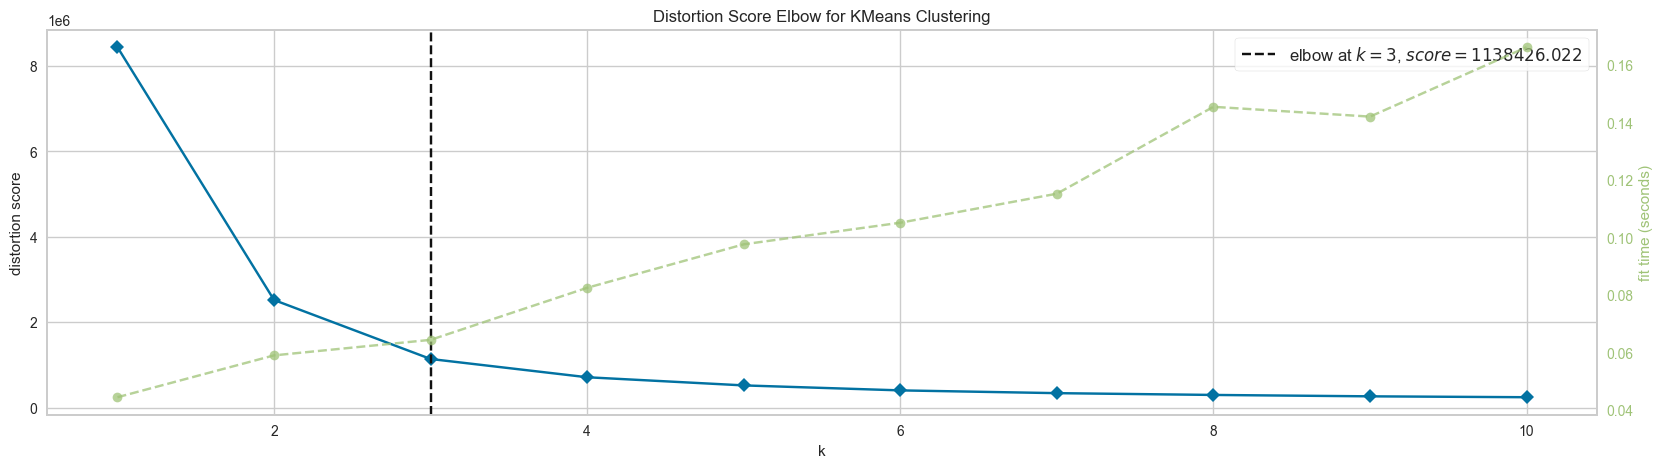

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [554]:
# The Yellowbrick module wraps the code with for loops and a plot 
# we would typically write into 3 or 4 lines of code in order to simplify the selection of Ks.

from yellowbrick.cluster import KElbowVisualizer

elb_visualizer = KElbowVisualizer(kmeans, k=(1,11))
elb_visualizer.fit(df_new)    
elb_visualizer.show()

In [555]:
import pandas as pd

# Load your DataFrame into df_new (replace this with your actual DataFrame)

# Randomly sample 1700 data points from df_new
df_sampled = df_new.sample(n=500, replace=False, random_state=42)

# The `n` parameter specifies the number of samples to be taken
# The `replace` parameter specifies whether sampling should be done with replacement (True) or without replacement (False)
# The `random_state` parameter is optional and provides a seed value for reproducibility

# df_sampled now contains 1700 randomly sampled data points from df_new


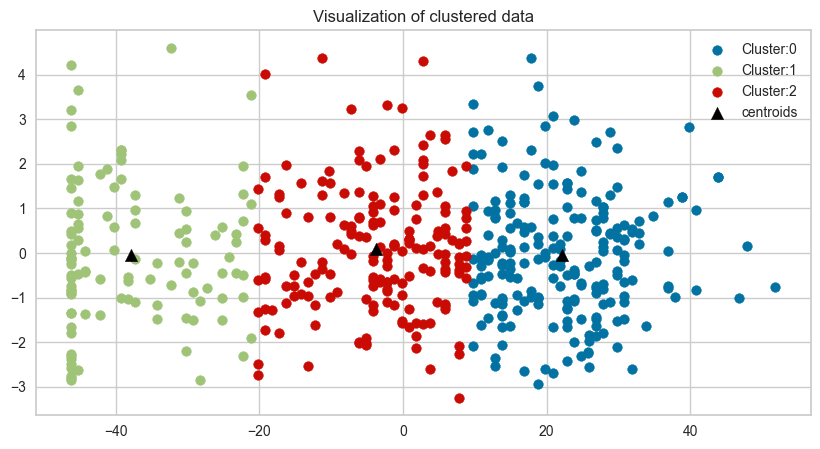

In [556]:
# We can apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

pca = PCA(2)

#Transform the data
df = pca.fit_transform(df_sampled)

#Initialize the class object
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] ,  label = "Cluster:" + str(i))

# Plot k-means clustering plot with centroids,
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^", c='black', s=80, label= 'centroids')
plt.title('Visualization of clustered data')
plt.legend()
plt.show()

In [557]:
# K=4 it's the value that the graph indicates that the error stops.
# In our case, the elbow is at approximately k = 4, 
# as the graph subsequently levels off.
from sklearn.neighbors import KNeighborsRegressor
k=3
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [558]:
def Evaluate(test, predicted, model_name):
    mean_abs_error = metrics.mean_absolute_error(test, predicted)
    mean_sqr_error = metrics.mean_squared_error(test, predicted)
    rmse = np.sqrt(mean_sqr_error)
    
    # Calculate accuracy based on a threshold or criteria
    threshold = 0.5 # Set a threshold for accuracy
    accuracy = (np.sum(np.abs(predicted - test) <= threshold) / len(test)) * 100

    print('Mean Absolute Error for {} is {}'.format(model_name, mean_abs_error))
    print('Mean Squared Error (MSE) for {} is {}'.format(model_name, mean_sqr_error))
    print('Root Mean Squared Error (RMSE) for {} is {}'.format(model_name, rmse))
    print('Accuracy for {} is {}%'.format(model_name, accuracy))


In [559]:
Evaluate(y_test,y_pred,"KNeighbours")

Mean Absolute Error for KNeighbours is 0.2120655898188938
Mean Squared Error (MSE) for KNeighbours is 0.1119676945668135
Root Mean Squared Error (RMSE) for KNeighbours is 0.33461574166021163
Accuracy for KNeighbours is popularity_range    85.756241
dtype: float64%
